In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ast import literal_eval

In [65]:
results = pd.read_csv('../data/callbacks/results2024-04-02.csv', index_col=0).set_index(['sampler', 'initer', 'imputer'])


In [66]:
edge2mean = results[results['type'] == 'mean'].drop('type', axis=1).mean().sort_values().iloc[[0,1,-1,-2]]

In [85]:
tmp = results.groupby(['sampler', 'initer', 'imputer', 'type']
                      ).aggregate('first').reset_index(
                      ).set_index(['sampler', 'initer', 'imputer',])#.pivot(columns=['type'])

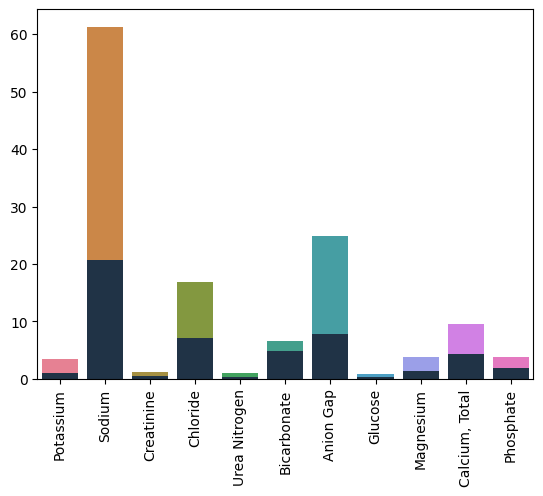

In [96]:
sns.barplot(tmp[tmp['type'] == 'mean'].reset_index(), errorbar=None)
stds = tmp[tmp['type'] =='std'].drop('type', axis=1).mean()
sns.barplot(stds, color=(.1, .2, .3))
plt.xticks(rotation=90);

In [105]:
means = tmp[tmp['type'] == 'mean'].drop('type', axis=1).reset_index()
stds =  tmp[tmp['type'] == 'std'].drop('type', axis=1).reset_index()

In [117]:
def selector(means, col, vals):
    for val in vals:
        f = lambda x: val in x
        yield means[means[col].map(f)]

select_init = iter(selector(means, 'initer', ['KNN', 'Random', 'Radius']))
select_imp = iter(selector(means, 'imputer', ['Feature', 'mf']))


In [121]:
next(select_imp)

,sampler,initer,imputer,Potassium,Sodium,Creatinine,Chloride,Urea Nitrogen,Bicarbonate,Anion Gap,Glucose,Magnesium,"Calcium, Total",Phosphate
5,"({'droprate': 0.1, 'data_cols': ['allinref', '...","({'n_neighbors': 2}, 'KNNInit')","({'train_epochs': 1, 'model': GAEMF(\n (enc):...",3.084878,33.869453,14.264957,15.248216,3.204008,1.938123,0.873541,1.965099,5.318701,9.134110,1.089952
6,"({'droprate': 0.1, 'data_cols': ['allinref', '...","({'n_neighbors': 2}, 'KNNInit')","({'train_epochs': 2, 'model': GAEMF(\n (enc):...",8.786353,125.789638,7.854578,40.318637,3.199238,4.445832,1.563842,1.737080,13.575494,21.176912,1.120763
12,"({'droprate': 0.1, 'data_cols': ['allinref', '...","({'n_neighbors': 4}, 'KNNInit')","({'train_epochs': 1, 'model': GAEMF(\n (enc):...",14.847033,402.416329,8.750026,108.166284,17.384883,12.010152,4.087838,1.496182,22.144810,50.350071,6.138121
13,"({'droprate': 0.1, 'data_cols': ['allinref', '...","({'n_neighbors': 4}, 'KNNInit')","({'train_epochs': 2, 'model': GAEMF(\n (enc):...",17.491245,512.131989,4.505499,94.788660,4.778817,7.386532,42.838279,1.406099,15.094906,33.306549,8.943257
19,"({'droprate': 0.1, 'data_cols': ['allinref', '...","({'n_neighbors': 5}, 'KNNInit')","({'train_epochs': 1, 'model': GAEMF(\n (enc):...",17.741543,283.853406,3.051299,40.285993,3.691482,53.833260,304.631412,1.564924,8.890148,24.064197,72.505823
20,"({'droprate': 0.1, 'data_cols': ['allinref', '...","({'n_neighbors': 5}, 'KNNInit')","({'train_epochs': 2, 'model': GAEMF(\n (enc):...",14.400920,237.190720,3.089032,32.279122,4.234984,65.831610,299.076176,1.631531,8.025460,38.011439,56.353178
26,"({'droprate': 0.1, 'data_cols': ['allinref', '...","({'n_neighbors': 8}, 'KNNInit')","({'train_epochs': 1, 'model': GAEMF(\n (enc):...",15.973924,249.486875,6.704514,51.709270,10.048212,158.464846,777.393540,1.911971,16.190570,119.122277,65.295818
27,"({'droprate': 0.1, 'data_cols': ['allinref', '...","({'n_neighbors': 8}, 'KNNInit')","({'train_epochs': 2, 'model': GAEMF(\n (enc):...",13.588410,214.703076,3.628618,158.519943,7.430900,114.594166,375.699921,2.005180,8.724249,83.850313,34.182589
33,"({'droprate': 0.1, 'data_cols': ['allinref', '...","({'radius': 0.1}, 'EpsilonRadiusInit')","({'train_epochs': 1, 'model': GAEMF(\n (enc):...",1.049443,6.218407,1.794197,1.777535,1.376027,1.012552,9.002874,1.029259,1.137112,1.198252,0.916479
34,"({'droprate': 0.1, 'data_cols': ['allinref', '...","({'radius': 0.1}, 'EpsilonRadiusInit')","({'train_epochs': 2, 'model': GAEMF(\n (enc):...",1.001840,178.877741,1.952482,61.904727,1.369372,0.692137,21.997284,1.658711,10.687328,7.505010,0.916653
